<a href="https://colab.research.google.com/github/Sambhaji6529/Project_Restaurant/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statements**
**xyz Inc wants to open restaurant caffe chain in Banglore City. what you should advice Them?**

# **Introduction**
we are analyzing the dataset of the bangalore city to 
get an idea of factors affecting establishment of different 
types places in bangalore. 
and also aggreate rating of each restaurants, bangalore is 
having more than 51,000 restaurants with serving dishes 
from all over the world.  

In Bangalore city each day new  opening of restaurants
will be there, so demand is too  high for  restaurannt 
business. increasing demand is high but it is diffculty for 
new restaurants to compete with established one.
As Bangalore is an  IT Capital of India. People are too
busy with work so dont have time to cook thats why people 
incline towords restaurant food.
for such demand its important to  study about restaurant, 
demography,cuisines etc...

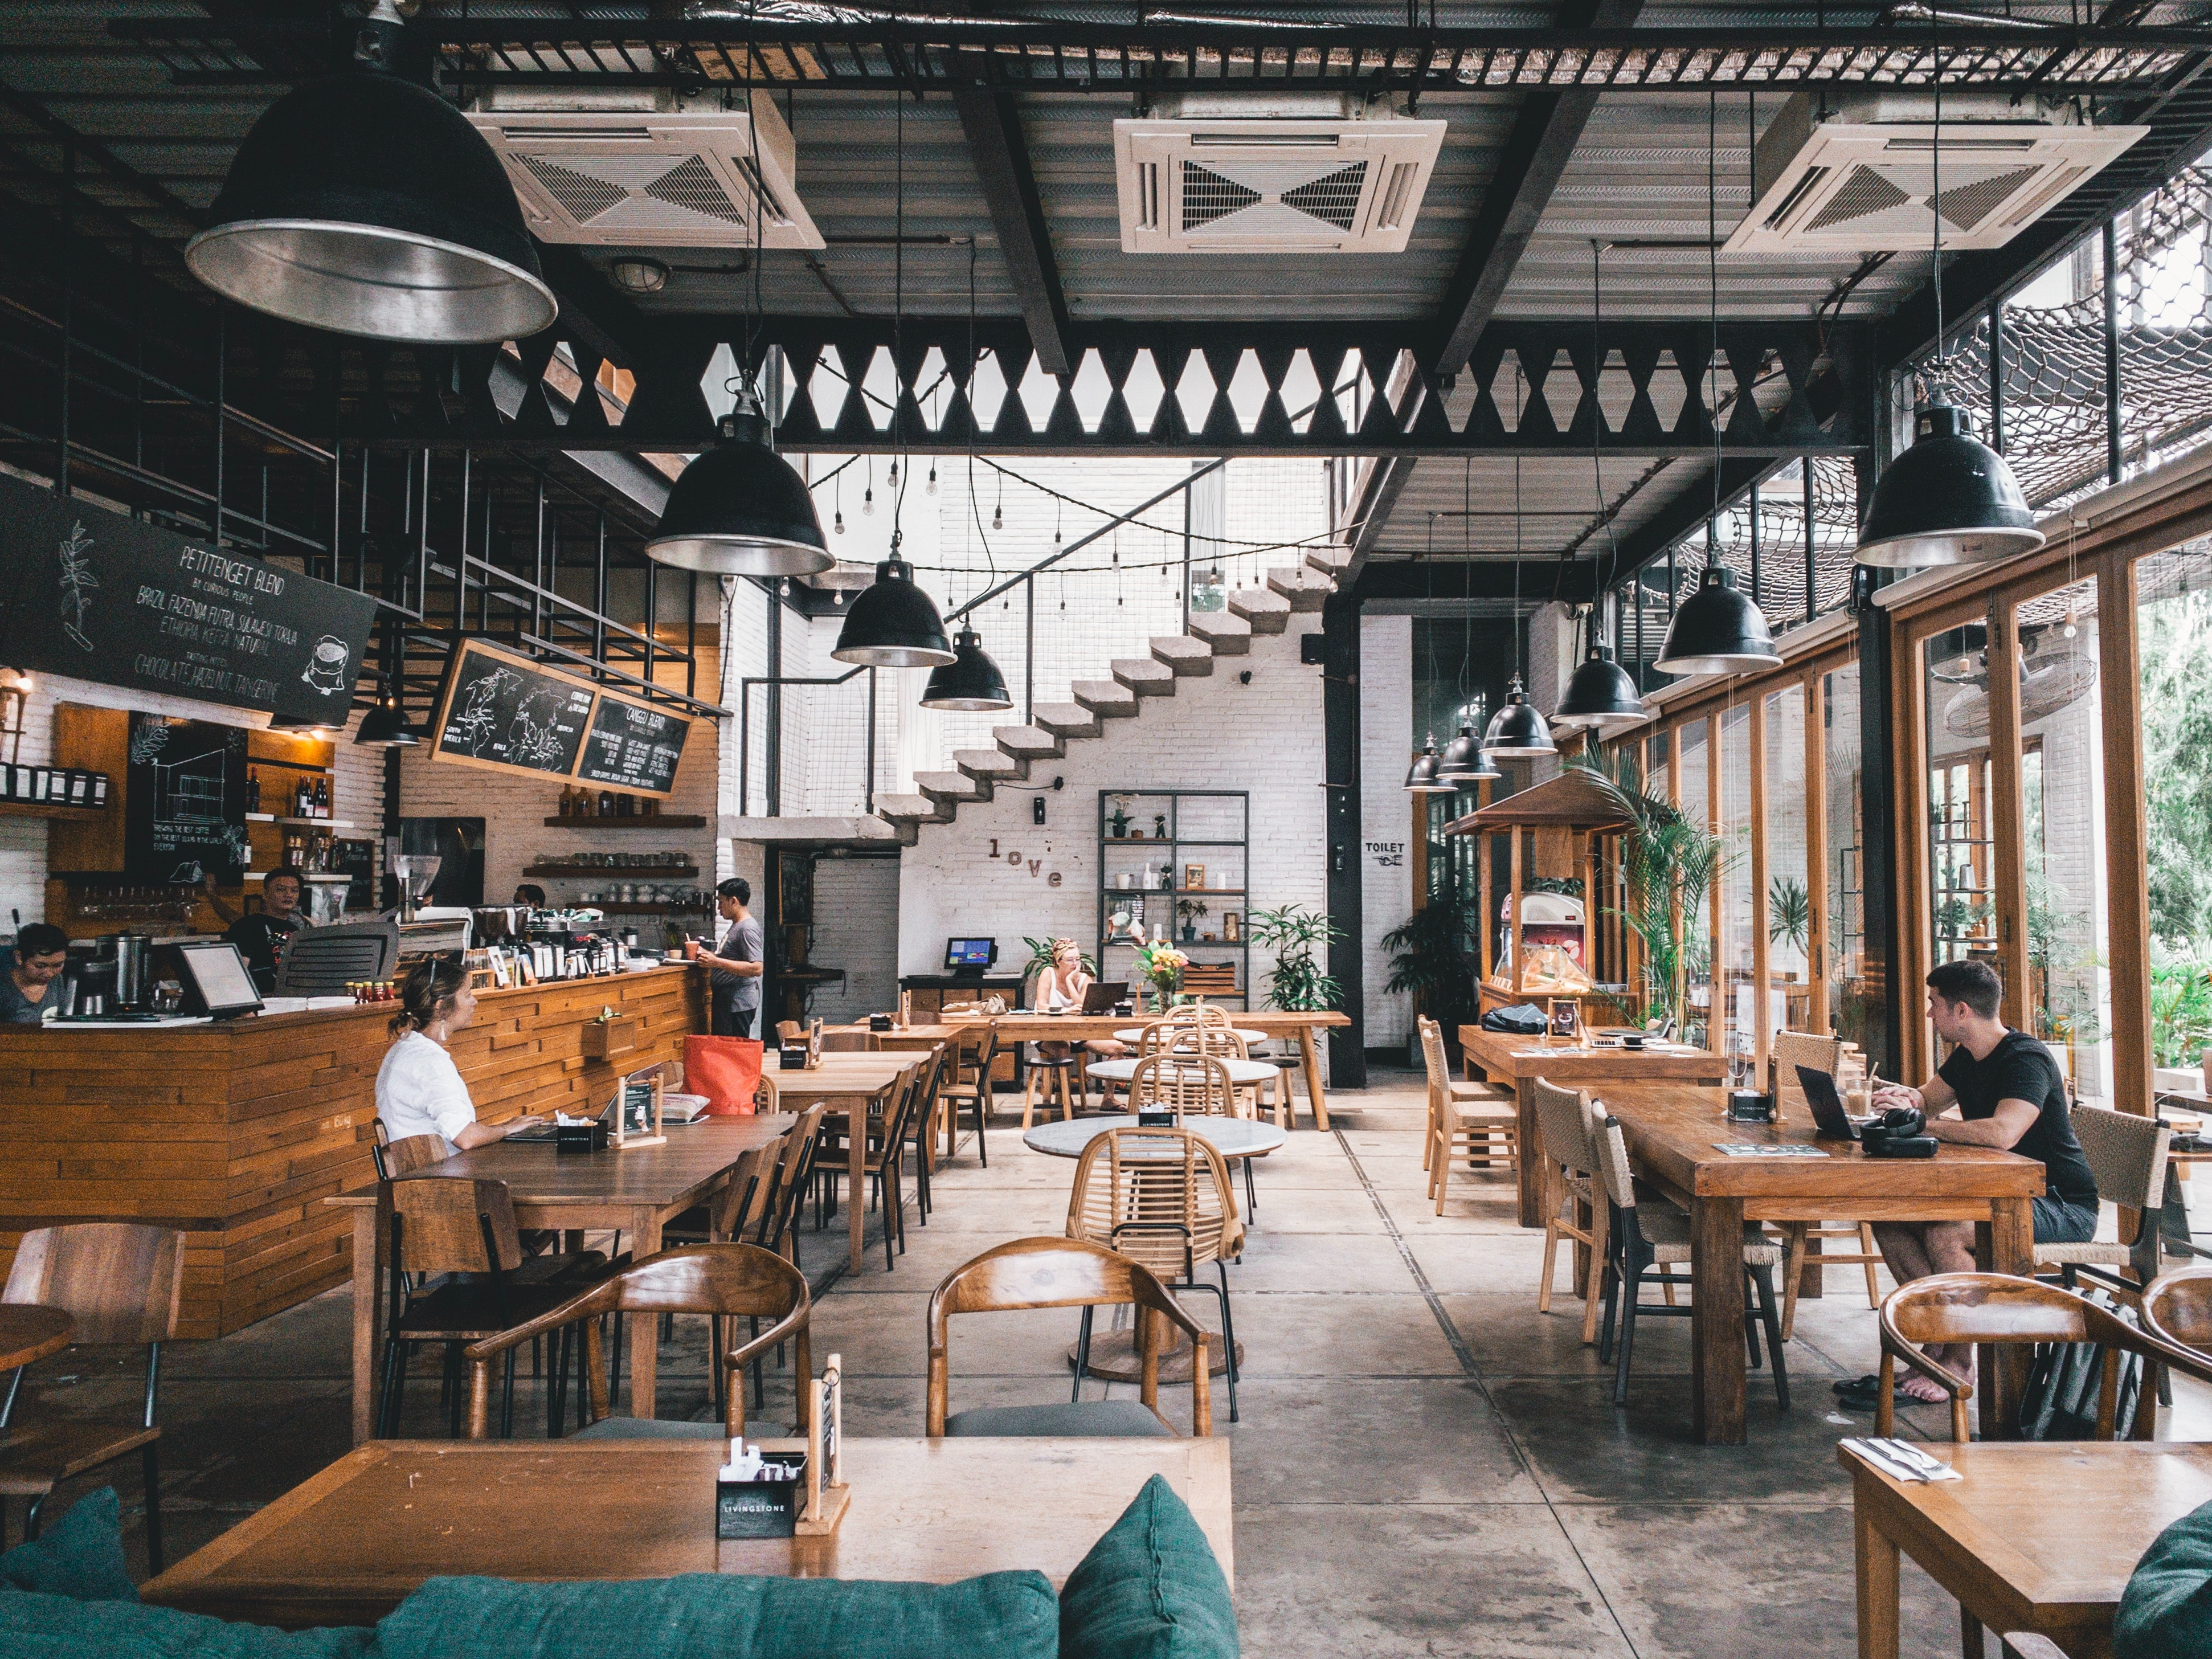

# **Index:**

**1. Importing the libraries.**

**2. Preprocessing the data.**

  

*   **Loading the dataset.**
*   **Renaming columns.**
*   **drop unwanted column.**
*   **Data cleaning.**

**3. EDA**


*   **Top restaurant chains in Bangalore.**
*   **What areas are paradise for the foodies?**


*   **Online Order Facility.**
*  **Offline Order Facility.**


*   **Rating Distribution.**
*  **Rating Vs Online Order.**


*   **Rating Vs Offline Booking.**
*   **Distribution Of Cost For Two People.**

**4. Most Common Restaurant Types In The City.**

**5. Common Cuisines In The Restaurants.**

**6.Considering Affordabiliity**

**7. Checking Type Of Service**

**8. violinplot**






# Importing the libraries

In [2]:
import pandas as pd # linear algebra
import numpy as np  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os,sys
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium
from tqdm import tqdm

# **Preprocessing the data**

# **Loading the dataset**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/zomato.csv")
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                             phone  \
0            Yes   4.1/5    775    080 42297555\r\n+91 9743772233   
1             No   4.1/5    787                      080 41714161   
2             No   3.8/5    918                    +91 9663487993   
3             No   3.7/5     88                    +91 9620009302   
4             No   3.8/5    166  +91 8026612447\r\n+91 9901210005   
...          ...     ...    ...                               ...   
51712         No  3.6 /5     27                      080 40301477   
51713         No     NaN      0                    +91 8197675843   
51714         No     NaN      0                               NaN   
51715        Yes  4.3 /5    236                      080 49652769   
51716         No  3.4 /5     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

In [4]:
df.shape  #number of rows and columns in dataset

(51717, 17)

In [5]:
df.dtypes #Kind of data each column consists

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
df.head()


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [7]:
df.tail()

url  \
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes           phone                    location  \
51712         No  3.6 /5     27    080 40301477                  Whitefield   
51713         No     NaN      0  +91 8197675843                  Whitefield   
51714         No     NaN      0             NaN                  Whitefield   
51715        Yes  4.3 /5    236    080 49652769  ITPL Main Road, Whitefield   
51716         No  3.4 /5     13  +91 8071117272  ITPL Main Road, Whitefield   

                rest_type                    dish_liked  \
51712                 Bar                           NaN   
51713                 Bar                           NaN   
51714                 Bar                           NaN   
51715                 Bar  Cocktails, Pizza, Buttermilk   
51716  Bar, Casual Dining                           NaN   

                                     cuisines approx_cost(for two people)  \
51712                             Continental                       1,500   
51713                             Finger Food                         600   
51714                             Finger Food                       2,000   
51715                             Finger Food                       2,500   
51716  Finger Food, North Indian, Continental                       1,500   

                                            reviews_list menu_item  \
51712  [('Rated 5.0', "RATED\n  Food and service are ...        []   
51713                                                 []        []   
51714                                                 []        []   
51715  [('Rated 4.0', 'RATED\n  Nice and friendly pla...        []   
51716  [('Rated 5.0', 'RATED\n  Great ambience , look...        []   

      listed_in(type) listed_in(city)  
51712   Pubs and bars      Whitefield  
51713   Pubs and bars      Whitefield  
51714   Pubs and bars      Whitefield  
51715   Pubs and bars      Whitefield  
51716   Pubs and bars      Whitefield

In [8]:
df.columns   #cursory glance of each column present in dataset 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
len(df.columns)    #total number of columns present in given dataset

17

In [10]:
df.isnull().values.any()    #Does dataset contain any null value if true then will count total null value present in each column

True

In [11]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**Now i have got a good understanding of dataset now my next step would be datapreprocessing including modification of data in such a way that it would be understandable by machine**

In [12]:
print("unique value for online_order","\n",df.online_order.unique(),"\n","*"*100,"\n")   #printing list of unique variable present in given feature
print("unique value for book_table","\n",df.book_table.unique())

unique value for online_order 
 ['Yes' 'No'] 
 **************************************************************************************************** 

unique value for book_table 
 ['Yes' 'No']


# Renaming columns

In [13]:
df=df.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"})
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines cost  \
0  North Indian, Mughlai, Chinese  800   
1     Chinese, North Indian, Thai  800   
2          Cafe, Mexican, Italian  800   
3      South Indian, North Indian  300   
4        North Indian, Rajasthani  600   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []  Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []  Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []  Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [14]:
df["cost"]=df.cost.str.replace(",","") #Checking cost from  the table
df["cost"]

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: cost, Length: 51717, dtype: object

In [15]:
df=df.dropna(how="any",axis=0)   #dropping all those columns having a any null value
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [16]:
df.shape  

(23193, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           23193 non-null  object
 1   address       23193 non-null  object
 2   name          23193 non-null  object
 3   online_order  23193 non-null  object
 4   book_table    23193 non-null  object
 5   rate          23193 non-null  object
 6   votes         23193 non-null  int64 
 7   phone         23193 non-null  object
 8   location      23193 non-null  object
 9   rest_type     23193 non-null  object
 10  dish_liked    23193 non-null  object
 11  cuisines      23193 non-null  object
 12  cost          23193 non-null  object
 13  reviews_list  23193 non-null  object
 14  menu_item     23193 non-null  object
 15  type          23193 non-null  object
 16  city          23193 non-null  object
dtypes: int64(1), object(16)
memory usage: 3.2+ MB


# **drop unwanted column**

In [18]:
df.drop(["url","phone"],axis="columns", inplace=True)
df.head()
# 0: rows in data frame
# 1: columns in data frame

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines cost  \
0  North Indian, Mughlai, Chinese  800   
1     Chinese, North Indian, Thai  800   
2          Cafe, Mexican, Italian  800   
3      South Indian, North Indian  300   
4        North Indian, Rajasthani  600   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []  Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []  Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []  Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

# Data cleaning

In [19]:
df['online_order']=df['online_order'].apply(lambda x: '1' if str(x)=='Yes' else '0')
df['book_table']=df['book_table'].apply(lambda x: '1' if str(x)=='Yes' else '0')
df['rate']=df['rate'].apply(lambda x: str(x).split('/')[0])
df['cost']=df['cost'].apply(lambda x: str(x).replace(',',''))
df.dropna(subset=['rate','cost'])
df=df[df['rate']!='nan']
df=df[df['rate']!='NEW']
df=df[df['rate']!='-']
df=df[df['cost']!='nan']
df['rate']=df['rate'].astype(float)
df['votes']=df['votes'].astype(int)
df['cost']=df['cost'].astype(int)

In [20]:
df.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0            1          1   4.1    775  Banashankari        Casual Dining   
1            1          0   4.1    787  Banashankari        Casual Dining   
2            1          0   3.8    918  Banashankari  Cafe, Casual Dining   
3            0          0   3.7     88  Banashankari          Quick Bites   
4            0          0   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  cost  \
0  North Indian, Mughlai, Chinese   800   
1     Chinese, North Indian, Thai   800   
2          Cafe, Mexican, Italian   800   
3      South Indian, North Indian   300   
4        North Indian, Rajasthani   600   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []  Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []  Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []  Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

# EDA

**Which are the top restaurant chains in Bangalore ?**

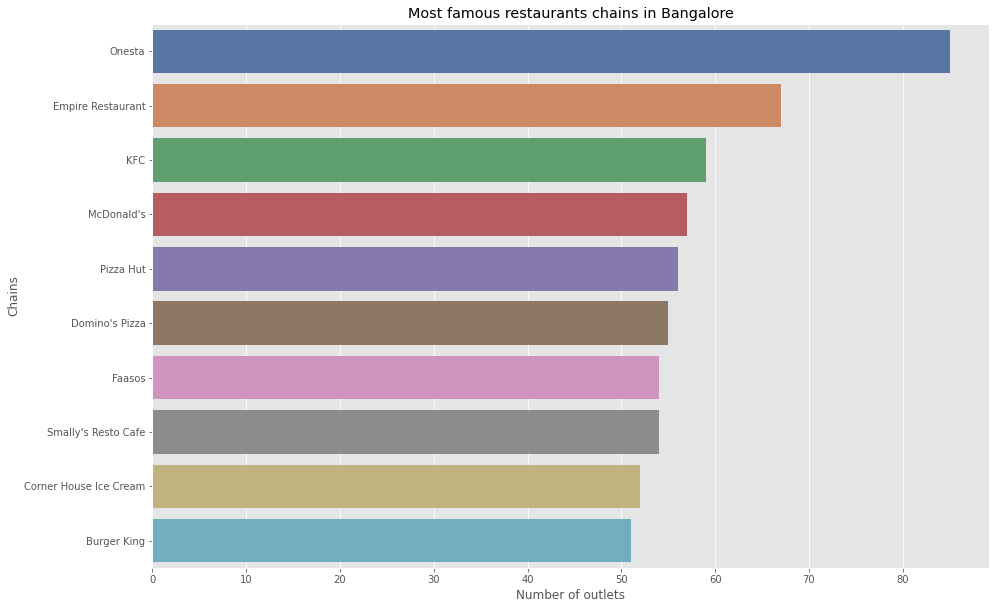

In [21]:
plt.figure(figsize=(15,10))
chains=df['name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")
plt.ylabel("Chains")
plt.show()

**We can see that Onesta has the most number of outlets. Founded in February 2012**

**What areas are paradise for the foodies ?**

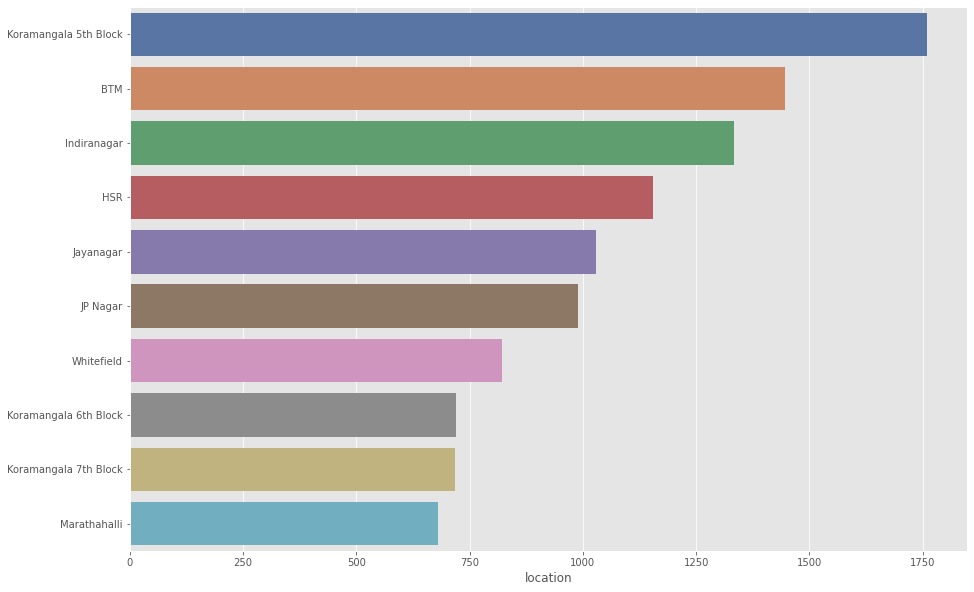

In [22]:
plt.figure(figsize=(15,10))
loc=df['location'].value_counts()[0:10]
sns.barplot(x=loc,y=loc.index,palette='deep')
plt.show()

**Koramangala 5th Block has roughly 1750 restaurants**

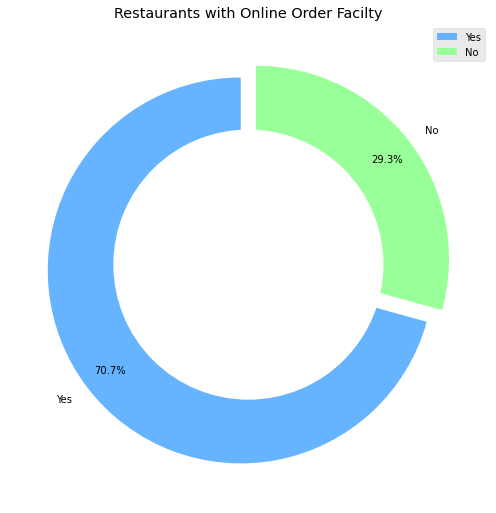

In [23]:
labels = ['Yes','No']
colors = ['#66b3ff','#99ff99']
explode = (0.05,0.05)

plt.figure(figsize=(8,7))
plt.pie(df['online_order'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.legend()
plt.title("Restaurants with Online Order Facilty")
plt.show()


**We can see that 70% restaurants have online order facilty which is very important in a fast paced life and also due to the food delivery app**

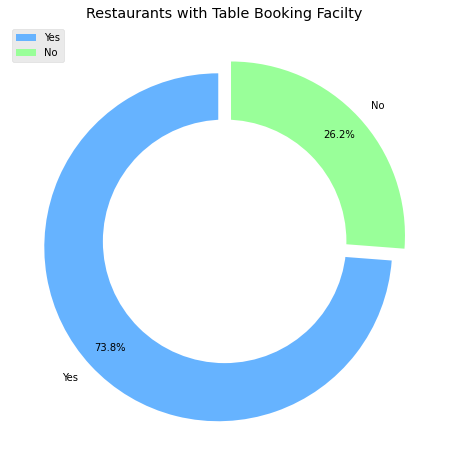

In [24]:
labels = ['Yes','No']
colors = ['#66b3ff','#99ff99']
explode = (0.05,0.05)

plt.figure(figsize=(8,8))
plt.pie(df['book_table'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.legend()
plt.title("Restaurants with Table Booking Facilty")
plt.show()

**We can see that 73% restaurants have a table booking facilty due to rush at peak hours.**

# Rating Distribution

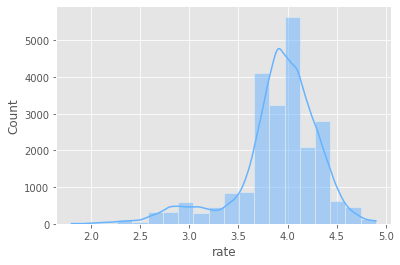

In [25]:
sns.histplot(df['rate'],bins=20,color='#66b3ff', kde=True)
plt.show()


* Major restaurants have rating 3.2 to 4.5

* Very Less restaurants have ratings less than 2.5

* Very few restaurants have ratings greater than 4.5

* We can conclude that most of the restaurants are of average to above average type.

# Rating vs Online Order

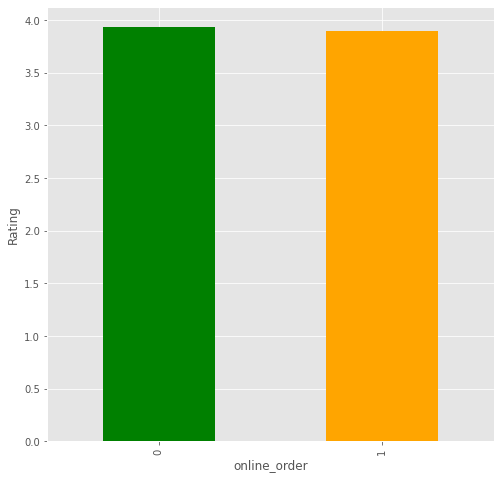

In [26]:
plt.figure(figsize=(8,8))
df.groupby('online_order')['rate'].mean().plot.bar(color=["green","orange"])
plt.ylabel('Rating')
plt.show()

**Avaliblity of online ordering facility has a very less impact on rating.**

# **Rating vs Table Booking**

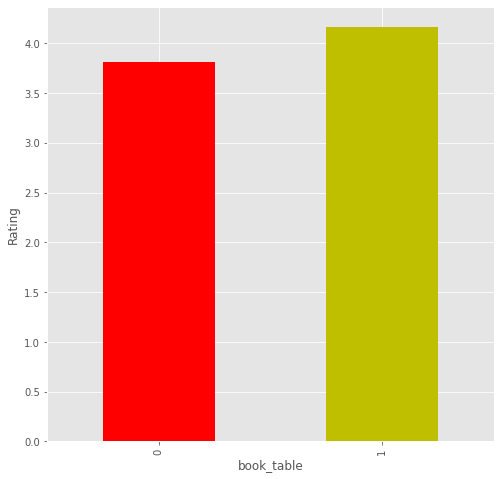

In [27]:
plt.figure(figsize=(8,8))
df.groupby('book_table')['rate'].mean().plot.bar(color=["r","y"])
plt.ylabel('Rating')
plt.show()

**Restaurants with table booking facility have higher ratings.**

# Distribution of cost for 2 people

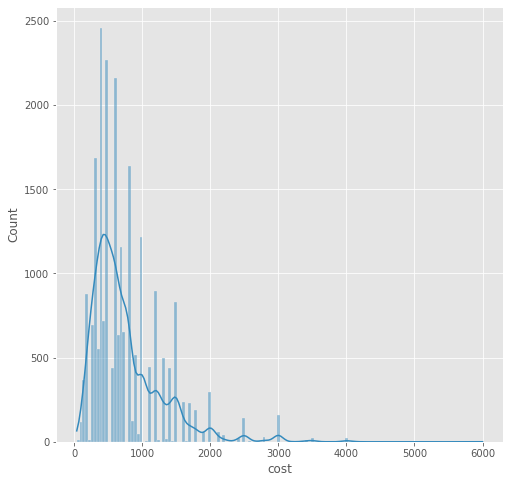

In [28]:
plt.figure(figsize=(8,8))
sns.histplot(df['cost'],kde=True)
plt.show()

Almost 90% restaurants are 1000 for 2

Number of very expensive restaurants is very less.

**Mean of Average Price for two people**

In [29]:
df[["cost"]].mean()

cost    754.299662
dtype: float64

**Most common restaurant types in the city.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



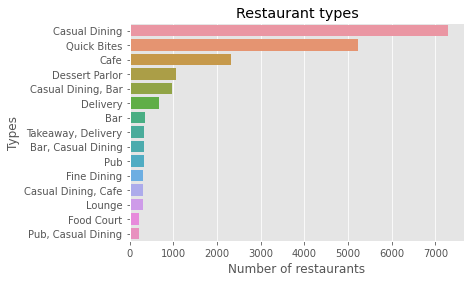

In [30]:
x=df['rest_type'].value_counts()[0:15]
sns.barplot(x,x.index)
plt.title("Restaurant types")
plt.xlabel("Number of restaurants")
plt.ylabel('Types')
plt.show()

 **People prefer Casual Dining due to fast paced life and hectic schedules**

**Common Cuisines in the restaurants**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



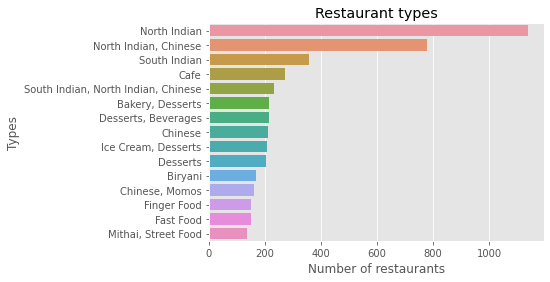

In [31]:
x=df['cuisines'].value_counts()[0:15]
sns.barplot(x,x.index)
plt.title("Restaurant types")
plt.xlabel("Number of restaurants")
plt.ylabel('Types')
plt.show()

**We see a South Indian city where people mostly prefer North Indian cuisine,this is because Banglore is a metro city. Number of restaurants who serve only North Indian is very high**

# **Considering affordablity**

**The restaurants which are very affordable are at these four  places in Basavanagudi, Housar Road, Sanjay Nagar, City Market.**

**The  most affordable restaurants are  in Basavanagudi** 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



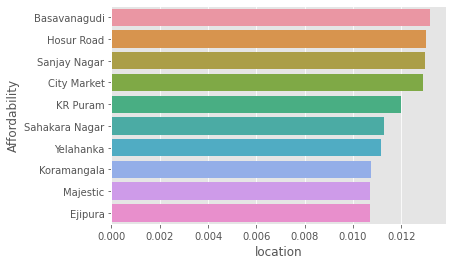

In [32]:
df['afford']=df['rate']/df['cost']
x=df.groupby('location')['afford'].mean().sort_values(ascending=False)[:10]
sns.barplot(x,x.index)
plt.xlabel('location')
plt.ylabel('Affordability')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



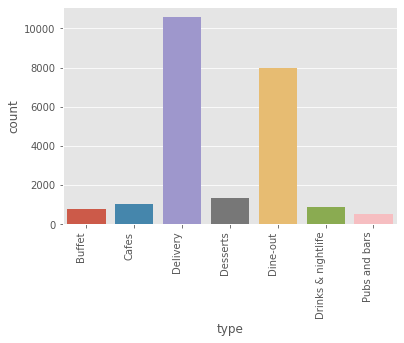

In [33]:
#checking type of service
sns.countplot(df.type).set_xticklabels(sns.countplot(df.type).get_xticklabels(),rotation=90,ha="right")
plt.show()

# **Violinplot**

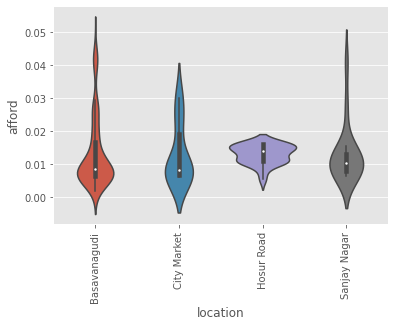

In [34]:
#sns.violinplot(x="location")
top_afford=df[df['location'].isin(['Basavanagudi','Hosur Road','City Market',
                                      'Sanjay Nagar'])]
sns.violinplot(x='location',y='afford',data=top_afford)
plt.xticks(rotation=90)
plt.show()

**Sanjay Nagar has very high variance considering affordablity**

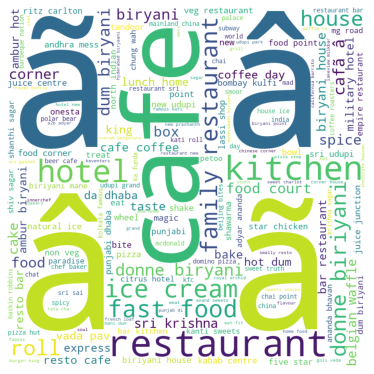

In [60]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/zomato.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.name:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


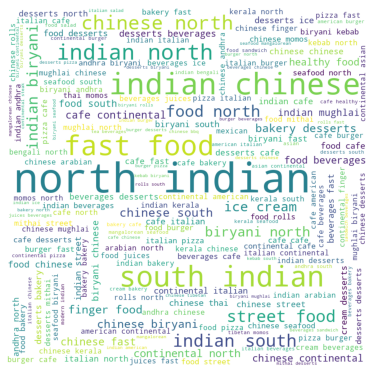

In [61]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/zomato.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.cuisines:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

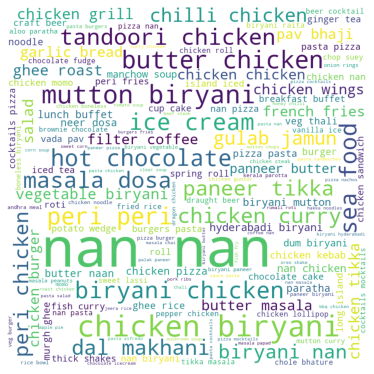

In [62]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/zomato.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.dish_liked :
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()